In [25]:
import fastf1 as ff1
import pandas as pd
import datetime
import time
import numpy as np
from fastf1 import plotting
from matplotlib import pyplot as plt
import plotly.express as px
from fastf1 import utils
from fastf1.livetiming.data import LiveTimingDat

## Abstract

I wanted to use the fast-f1 python package to collect and analyze the practice and qualifying data from this weekend's Emilia Romagna Grand Prix, and see if I could gain any insight to the teams practice strategies, and the performance of each car on the tire compounds that are going to be used in the race tomorrow (barring it doesn't rain, and if it does, it'll be a crapshoot). 

From what I gathered, I generated the general time differences on each compound, with the soft (C4) being 2.368 seconds faster than the hard (C2) compound, and 0.9 seconds faster than the medium (C3) compound. 

Additionally, I looked at the timing data from FP2 and noticed that a lot of the drivers put in their fastest lap of the session on the medium (C3) compound even though it is slower. I inferred that this is due to teams running heavier fuel loads with the soft (C4) compound to gather data on the tire's performance if they started the race on that compound. 

Lastly from the practice data, I looked at telemetry during the fastest laps on a medium (C3) and soft (C4) to see where in the lap time was gained/lost. 

Qualifying was very interesting as there were a few surprises. I looked at the telemetry data comparing Hamilton and Botas' fastest laps, along with comparing Perez and Verstappen's fastest laps to see where the faster driver had the edge over their counterpart. 

In [13]:
# load practice session data
# no data for fp1, pull fp2/fp3 
fp2 = ff1.get_session(2021, 'Imola', 'FP2').load_laps()
fp3 = ff1.get_session(2021, 'Imola', 'FP3').load_laps()

fp2 = pd.DataFrame(fp2)
fp3 = pd.DataFrame(fp3)

core        WARNING 	Ergast API lookup failed. The session is very recent and not yet available or does not exist.
core           INFO 	Loading Emilia Romagna Grand Prix - Practice 2
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api         WARNING 	Driver 16: Ignoring late data for a previously processed lap.The data may contain errors (previous: 23; current 24)
api         WARNING 	Driver 63: Ignoring late data for a previously processed lap.The data may contain errors (previous: 7; current 8)
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
core           INFO 	Loaded data for 20 drivers: ['3', '4', '5', '6', '7', '9', '10', '11', '14', '16', '18', '22', '31', '33', '44', '47', '55', '63', '77', '99']
core        WARNING 	Ergast API lookup failed. The session is very recent and not yet availa

In [53]:
# filter for clear track laps
fp2_clear = fp2[fp2["TrackStatus"] == '1']
fp3_clear = fp3[fp3["TrackStatus"] == '1']


# fp2 pace by driver
fp2_pace = px.box(fp2_clear, x="Driver", y="LapTime", color = "Compound", title='LapTime per Driver (Compound) - FP2')
fp2_pace.show()

# fp3 pace by driver 
fp3_pace = px.box(fp3_clear, x="Driver", y="LapTime", color = "Compound", title='LapTime per Driver (Compound) - FP3')
fp3_pace.show()

As seen in the plot above, most drivers spent the FP2 on the medium and soft compound tires. Only LAT, RAI, RUS, MSC, and MAZ put in laps on the hard compound. 

Something to note is that there in most cases, the min lap times on the soft compound are slower than those of the medium compound. I would think this is because teams were doing heavier fuel runs on the soft compound, to gather data on how the tires would perform if they started the race on that compound, and then completing laps on the medium compound with less fuel. 

In FP3, only the medium and soft compound tires were used. In this session, the softer compound tires resulted in faster lap times as expected. In this session it seemed as though the teams were dialing in the cars for qualifying. 

In [54]:
# convert lap time to float
fp2_clear["ms"] = fp2_clear.LapTime.astype("timedelta64[ms]")

fp2_clear.groupby(["Driver", "Compound"]).agg({"ms": ['mean', 'min']})

<ipython-input-54-0a146efc3f29>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



ms         
                         mean      min
Driver Compound                       
ALO    MEDIUM    88259.000000  78342.0
       SOFT      85687.529412  76835.0
BOT    MEDIUM    84928.214286  75551.0
       SOFT      86231.000000  75641.0
GAS    MEDIUM    88003.250000  76117.0
       SOFT      83429.333333  75629.0
GIO    MEDIUM    88822.333333  77766.0
       SOFT      89260.166667  76513.0
HAM    MEDIUM    84447.933333  75672.0
       SOFT      92026.250000  75561.0
LAT    HARD      93521.750000  78802.0
       SOFT      86099.666667  76823.0
LEC    MEDIUM    84867.818182  76705.0
       SOFT      89676.181818  75367.0
MAZ    HARD      91675.500000  91177.0
       MEDIUM    93499.000000  80158.0
       SOFT      93788.000000  77857.0
MSC    HARD      81680.500000  78606.0
       MEDIUM    82064.800000  81299.0
       SOFT      89241.375000  77350.0
NOR    MEDIUM    89072.600000  77400.0
       SOFT      83303.727273  76485.0
OCO    MEDIUM    82926.800000  77360.0
       SOFT      90899.500000  76817.0
PER    MEDIUM    84566.266667  76883.0
       SOFT      85136.500000  76411.0
RAI    HARD      86703.500000  77845.0
       SOFT      85846.857143  77273.0
RIC    MEDIUM    88356.333333  77281.0
       SOFT      85747.500000  76782.0
RUS    HARD      83880.823529  78648.0
       SOFT      92491.111111  77179.0
SAI    MEDIUM    96137.200000  76723.0
       SOFT      85325.777778  75834.0
STR    MEDIUM    82651.428571  78099.0
       SOFT      89614.000000  76737.0
TSU    MEDIUM    86773.000000  77194.0
       SOFT      85883.812500  76419.0
VER    MEDIUM    84108.000000  76999.0
VET    MEDIUM    82778.875000  77826.0
       SOFT      90725.200000  77092.0

In [52]:
# convert lap time to float
fp3_clear["ms"] = fp3_clear.LapTime.astype("timedelta64[ms]")

fp3_clear.groupby(["Driver", "Compound"]).agg({"ms": ['mean', 'min']})

<ipython-input-52-e8a37b919b9f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



ms         
                         mean      min
Driver Compound                       
ALO    MEDIUM    89441.000000  77149.0
       SOFT      99512.375000  76186.0
BOT    SOFT      96390.923077  75908.0
GAS    MEDIUM    88630.777778  75890.0
       SOFT      92577.500000  76012.0
GIO    MEDIUM    92757.384615  77052.0
       SOFT      85577.250000  76612.0
HAM    SOFT      93028.000000  75515.0
LAT    SOFT      98144.700000  76680.0
LEC    MEDIUM    87870.166667  76332.0
       SOFT      98641.100000  75738.0
MAZ    SOFT      89938.111111  76793.0
MSC    SOFT      92900.500000  76448.0
NOR    MEDIUM    97119.625000  76723.0
       SOFT      85530.333333  75414.0
OCO    MEDIUM    88922.666667  77348.0
       SOFT      97525.300000  76228.0
PER    MEDIUM    88896.571429  76414.0
       SOFT      97504.833333  75551.0
RAI    MEDIUM    83406.571429  76949.0
       SOFT      92651.888889  76775.0
RIC    MEDIUM    99429.857143  77298.0
       SOFT      87681.200000  76389.0
RUS    SOFT      95872.615385  76427.0
SAI    MEDIUM    96903.000000  76901.0
       SOFT      95120.777778  75908.0
STR    MEDIUM    92741.500000  76772.0
       SOFT      98535.833333  76245.0
TSU    MEDIUM    96132.777778  77065.0
       SOFT      92582.500000  76230.0
VER    SOFT      93783.272727  74958.0
VET    MEDIUM    89070.714286  76790.0
       SOFT      99723.666667  76389.0

In [55]:
fp2_clear.groupby(["Compound"]).agg({"ms": ['mean', 'min']})

ms         
                  mean      min
Compound                       
HARD      85326.405405  77845.0
MEDIUM    85529.673077  75551.0
SOFT      87084.075269  75367.0

In [45]:
# hard v medium - 2184 ms slower
77845 - 75551
# hard v soft - 2368 ms slower
77735 - 75367
# medium vs soft - 184 ms slower
75551 - 75367

184

In [56]:
fp3_clear.groupby(["Compound"]).agg({"ms": ['mean', 'min']})

ms         
                  mean      min
Compound                       
MEDIUM    91814.950000  75890.0
SOFT      94462.940541  74958.0

In [48]:
# medium vs soft - 932 ms slower
75890 - 74958 

932

Using the fastest lap turned in on each compound, I calculated deltas to see how much slower compounds are compared to one another. 

I used the fastest lap as the practice plans of the teams can throw off the average lap times on each compound. There are many factors that inflate this number such as carrying more fuel, slow laps to recharge the battery, etc. 

However, by using the fastest lap it can be inferred that the driver was pushing the car to the maximum given the circumstances. 

I found that the soft compound (C4) was 932 ms or 0.9 seconds faster than the medium (C3) in FP3, which is when all the teams used either of the two compounds. The hard compound (C2) was used by a handful of teams in FP2, and was 2368 ms or 2.368 seconds slower than the soft in that session.

In [78]:
# using fp3 data compare telemetry from laps on each compound
fp3_t = ff1.get_session(2021, 'Imola', 'FP3')
fp3_t_laps = fp3_t.load_laps(with_telemetry=True)

core        WARNING 	Ergast API lookup failed. The session is very recent and not yet available or does not exist.
core           INFO 	Loading Emilia Romagna Grand Prix - Practice 3
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
core           INFO 	Loaded data for 20 drivers: ['99', '16', '5', '31', '6', '14', '10', '77', '3', '7', '33', '9', '22', '63', '47', '4', '44', '55', '11', '18']


In [83]:
gas_fp3 = fp3_t_laps[fp3_t_laps["Driver"] == 'GAS']
gas_fp3_soft = gas_fp3[gas_fp3["Compound"] == 'SOFT']
gas_fp3_med = gas_fp3[gas_fp3["Compound"] == 'MEDIUM']

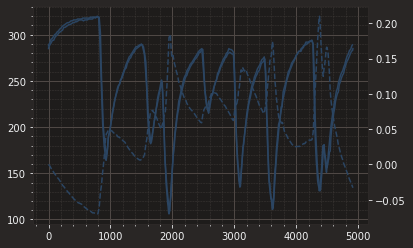

In [87]:
plotting.setup_mpl()

soft = gas_fp3_soft.pick_driver('GAS').pick_fastest()
medium = gas_fp3_med.pick_driver('GAS').pick_fastest()

delta_time, ref_tel, compare_tel = utils.delta_time(soft, medium)
# ham is reference, lec is compare

fig, ax = plt.subplots()
# use telemetry returned by .delta_time for best accuracy,
# this ensure the same applied interpolation and resampling
ax.plot(ref_tel['Distance'], ref_tel['Speed'],
        color=plotting.TEAM_COLORS[medium['Team']])
ax.plot(compare_tel['Distance'], compare_tel['Speed'],
        color=plotting.TEAM_COLORS[soft['Team']])

twin = ax.twinx()
twin.plot(ref_tel['Distance'], delta_time, '--', color=plotting.TEAM_COLORS[soft['Team']])
plt.show()

I plotted the telemetry of Gasly's fastest laps on the soft and medium compounds in FP3 to see where in the lap he was losing time attributed to each compound. 

It looks as though time is lost in the first chicaine and entering the heavy braking zone following the second chicaine. Additionally, time is lost coming out of the last two corners before the main straight. 

This could be areas of the track to watch for, as it could provide insight to degradation.

## Qualifying

In [64]:
# load quali session data
quali = ff1.get_session(2021, 'Imola', 'Q')

core           INFO 	Loading Emilia Romagna Grand Prix - Qualifying
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
core           INFO 	Loaded data for 20 drivers: ['99', '16', '5', '31', '6', '14', '10', '77', '3', '7', '33', '9', '22', '63', '47', '4', '44', '55', '11', '18']


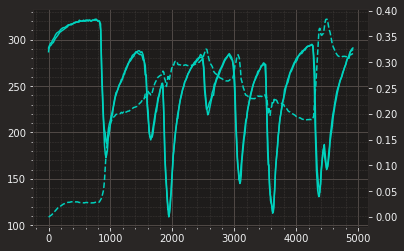

In [72]:
from fastf1 import utils
from fastf1.livetiming.data import LiveTimingData

plotting.setup_mpl()

laps = quali.load_laps(with_telemetry=True)
bot = laps.pick_driver('BOT').pick_fastest()
ham = laps.pick_driver('HAM').pick_fastest()

delta_time, ref_tel, compare_tel = utils.delta_time(ham, bot)
# ham is reference, lec is compared

fig, ax = plt.subplots()
# use telemetry returned by .delta_time for best accuracy,
# this ensure the same applied interpolation and resampling
ax.plot(ref_tel['Distance'], ref_tel['Speed'],
        color=plotting.TEAM_COLORS[ham['Team']])
ax.plot(compare_tel['Distance'], compare_tel['Speed'],
        color=plotting.TEAM_COLORS[bot['Team']])

twin = ax.twinx()
twin.plot(ref_tel['Distance'], delta_time, '--', color=plotting.TEAM_COLORS[bot['Team']])
plt.show()

One of the big surprises from qualifying is that Bottas was significantly off pace compared to Lewis, and is starting P8. 

Looking at the telemetry data from Botas and Lewis, it appears that Botas initially lost time at the first chicaine, and lost significant time coming out of the last couple of corners. The solid lines represent the speed over distance during the lap, and the dashed line shows the relative delta between the two drivers over the distance of the lap. 

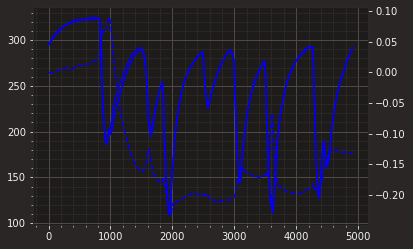

In [74]:
ver = laps.pick_driver('VER').pick_fastest()
per = laps.pick_driver('PER').pick_fastest()

delta_time, ref_tel, compare_tel = utils.delta_time(ver, per)
# ham is reference, lec is compared

fig, ax = plt.subplots()
# use telemetry returned by .delta_time for best accuracy,
# this ensure the same applied interpolation and resampling
ax.plot(ref_tel['Distance'], ref_tel['Speed'],
        color=plotting.TEAM_COLORS[ver['Team']])
ax.plot(compare_tel['Distance'], compare_tel['Speed'],
        color=plotting.TEAM_COLORS[per['Team']])

twin = ax.twinx()
twin.plot(ref_tel['Distance'], delta_time, '--', color=plotting.TEAM_COLORS[ver['Team']])
plt.show()

Another surprise was Perez outqualifying Verstappen, who hasn't been outqualified since Daniel Ricciardo was his teammate. After the session Verstappen said he lost time in turn 3, which is backed up by the telemetry data. The delta shoots up near 0.10 seconds around the first chicaine. 